Dowload data from wandb

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
!ls ../data

best.csv        mean.csv        min_fitness.csv size.csv
depth.csv       min.csv         output.txt      std.csv


In [22]:
import os
print (os.getcwd())

/Users/micheleyin/Documents/bio-inspired-mutant-battlegrounds/notebooks


In [39]:
# neat_config = pd.read_csv('../data/wandb_export_2023-03-25T14_58_49.117+01_00.csv')
mean_fitness = pd.read_csv('../data/mean.csv').rename(columns={
    'wise-snowball-17 - mean_fitness': 'Mean fitness',
    'Step': 'Iteration'
}).drop(columns=['wise-snowball-17 - mean_fitness__MAX', 'wise-snowball-17 - mean_fitness__MIN'])
best_fitness = pd.read_csv('../data/best.csv').rename(columns={
    'wise-snowball-17 - max_fitness': 'Best fitness',
    'Step': 'Iteration'
}).drop(columns=['wise-snowball-17 - max_fitness__MAX', 'wise-snowball-17 - max_fitness__MIN'])
std_fitness = pd.read_csv('../data/std.csv').rename(columns={
    'wise-snowball-17 - std_fitness': 'Stdev fitness',
    'Step': 'Iteration'
}).drop(columns=['wise-snowball-17 - std_fitness__MAX', 'wise-snowball-17 - std_fitness__MIN'])
# median_fitness = pd.read_csv('../data/wandb_export_2023-03-25T15_01_11.824+01_00.csv').rename(columns={
#     'proud-forest-2 - median_fitness': 'Median fitness',
#     'Step': 'Iteration'
# }).drop(columns=['proud-forest-2 - median_fitness__MAX', 'proud-forest-2 - median_fitness__MIN'])
# nodes_number = pd.read_csv('../data/wandb_export_2023-03-25T15_00_48.526+01_00.csv').rename(columns={
#     'proud-forest-2 - nodes_number': 'Nodes number',
#     'Step': 'Iteration'
# }).drop(columns=['proud-forest-2 - nodes_number__MAX', 'proud-forest-2 - nodes_number__MIN'])
# enabled_connections_number = pd.read_csv('../data/wandb_export_2023-03-25T15_01_00.220+01_00.csv').rename(columns={
#     'proud-forest-2 - enabled_connections_number': 'Enabled connections',
#     'Step': 'Iteration'
# }).drop(columns=['proud-forest-2 - enabled_connections_number__MAX', 'proud-forest-2 - enabled_connections_number__MIN'])
# connections_number = pd.read_csv('../data/wandb_export_2023-03-25T15_01_04.543+01_00.csv').rename(columns={
#     'proud-forest-2 - connections_number': 'Connections number',
#     'Step': 'Iteration'
# }).drop(columns=['proud-forest-2 - connections_number__MAX', 'proud-forest-2 - connections_number__MIN'])

In [40]:
fitness = mean_fitness.merge(best_fitness).merge(std_fitness)
# node_stats = nodes_number.merge(enabled_connections_number).merge(connections_number)

In [41]:
fitness

,Iteration,Mean fitness,Best fitness,Stdev fitness
0,0,315.863170,715.724915,167.375939
1,1,195.495843,1092.852539,302.628465
2,2,140.495903,998.608521,293.418254
3,3,133.627045,857.700073,269.023802
4,4,122.069331,847.747437,247.340311
...,...,...,...,...
495,495,151.327446,1013.825012,312.578641
496,496,172.260028,1140.549927,308.083623
497,497,142.835831,967.790588,299.180502
498,498,160.951661,1000.058289,289.084566


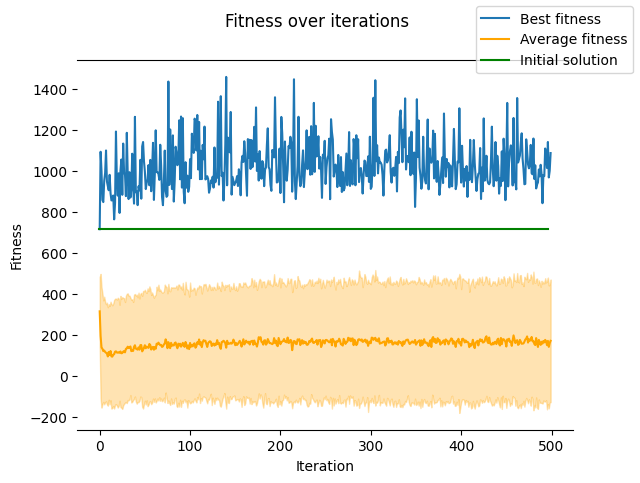

In [50]:
fig, ax = plt.subplots(1)
#ax2 = ax.twinx()
ax.plot(fitness.Iteration, fitness["Best fitness"], label='Best fitness')
ax.plot(fitness.Iteration, fitness["Mean fitness"], label='Average fitness', color='orange')
ax.fill_between(
    fitness.Iteration,
    fitness["Mean fitness"] - fitness["Stdev fitness"],
    fitness["Mean fitness"] + fitness["Stdev fitness"],
    color='orange',
    alpha=0.3
)
ax.axhline(y = 715, color = 'g', linestyle = '-', label="Initial solution", xmin=0.045, xmax=0.95)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.set_ylim([-400, 300])
#ax2.set_ylabel("Average fitness")
fig.suptitle("Fitness over iterations")
fig.legend()
fig.savefig("../assets/images/fitness_over_iterations_frozenlake_bt.pdf", bbox_inches='tight')
plt.show()